In [2]:
from ImageLab import *
import numpy as np
from PIL import Image
import cv2

In [3]:
CustomGx_img2 = Image.open(
    'Image/Powerline/Custom_Gx_Complex.png').convert('RGB')
CustomGx_img2 = np.array(CustomGx_img2)

CustomGy_img2 = Image.open(
    'Image/Powerline/Custom_Gy_Complex.png').convert('RGB')
CustomGy_img2 = np.array(CustomGy_img2)

# ImagePlotter(CustomGx_img2).plot_image('default')
# ImagePlotter(CustomGy_img2).plot_image('default')

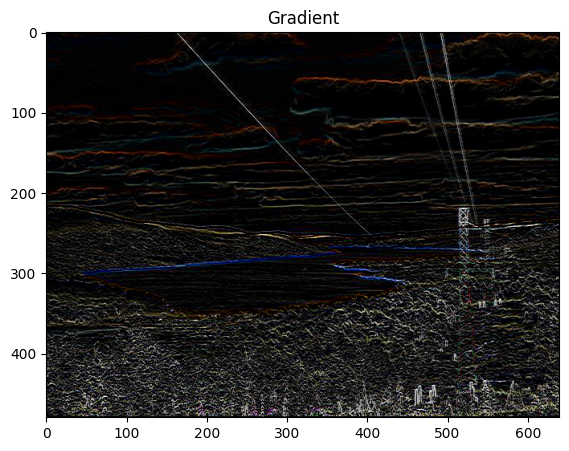

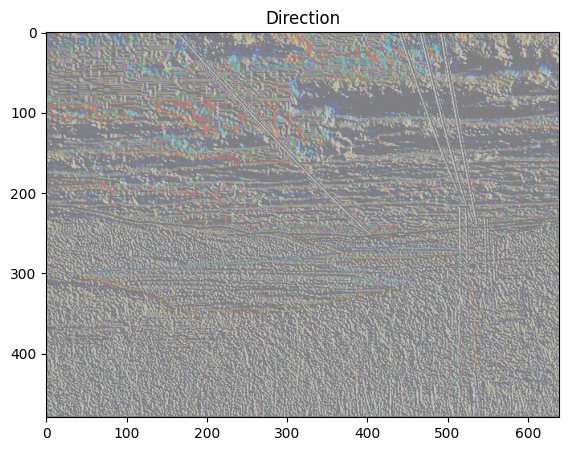

In [4]:
CustomGrad = EdgeDetect().gradient_mag(CustomGx_img2, CustomGy_img2)
ImagePlotter(CustomGrad).plot_image('Gradient')
Gradient_Path = ImageUtil(CustomGrad).save_image_to_folder('Image/Morphology', 'Gradient.png')

direction = EdgeDetect().gradient_direction(CustomGx_img2, CustomGy_img2)
ImagePlotter(direction).plot_image('Direction')
Gradient_Path = ImageUtil(CustomGrad).save_image_to_folder('Image/Morphology', 'Direction.png')


In [5]:
# Segmentation:
# segmented, segmented_path = ImageProcessor(Gradient_Path).process(Segmentation_Filter(), 3, '7x7 Dilated')

# ImagePlotter(segmented).plot_image('Sauvola')


In [6]:
# dilation_kernel = np.full((9, 9), 1)
# dilated, dilated_path = ImageProcessor(Gradient_Path).process(Dilation(), dilation_kernel, '7x7 Dilated')

In [7]:
# erosion_kernel = np.full((9, 9), 1)
# eroded, eroded_path = ImageProcessor(dilated_path).process(Erosion(), erosion_kernel, 'closed')

In [8]:
def apply_threshold(img, threshold_value):

    # Apply thresholding
    output = (img > threshold_value).astype(np.uint8) * 255

    # Display the output image
    ImagePlotter(output).plot_image(
        title=f'Threshold value: {threshold_value}')

    return output


def logical_and_rgb(image):
    # Split the image into its RGB channels
    red, green, blue = np.dsplit(image, 3)

    # Apply the logical AND operation across the RGB channels
    result = np.logical_and(red, np.logical_and(green, blue))

    return result

# log_and = logical_and_rgb(eroded)

# for threshold in range(20, 120, 20):
#     output = apply_threshold(eroded, threshold)
    

(5679, 1, 2)


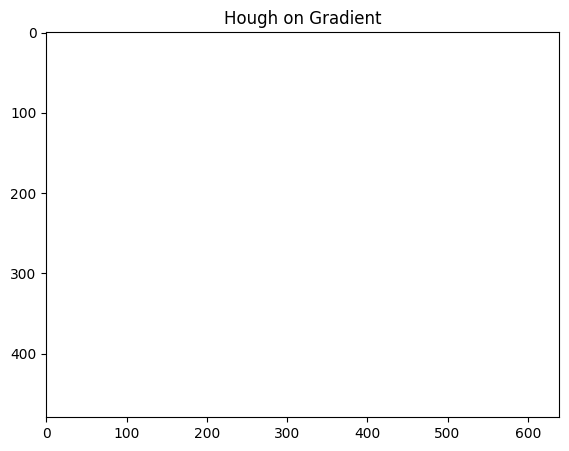

In [9]:
def hough_transform(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, 50, 150)

    # Apply Hough transform on the edge detected image
    lines = cv2.HoughLines(edges, 3, np.pi/180, 100)
    
    print(lines.shape)

    # Create an empty black image with the same size as the original image
    hough_image = np.full(image.shape, 255)

    # Draw lines on the black image
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))

            cv2.line(hough_image, (x1, y1), (x2, y2), (255, 255, 255), 1)

    return hough_image

hough_gradient = hough_transform(CustomGrad)
ImagePlotter(hough_gradient).plot_image('Hough on Gradient')